<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/branch_Dhairya/MIE1624_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning current Working Directory

Run only if using Colab

In [1]:
# The code below deletes the current runtime of this notebook, 
# so the following code cells will not be compiled even if you do "Runtime>Run all"
# Alternate suggestion: Use "Runtime>Run after"
# The purpose of this implementation is to have a fresh clone of our github repo
# everytime we run the notebook as our current working directory

# from google.colab import runtime
# runtime.unassign()

# Setting Up the Environment

In [2]:
# cloning our Project Repo
! git clone --single-branch --branch branch_Dhairya https://github.com/farhanwadia/nlp_g14.git

Cloning into 'nlp_g14'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 49 (delta 8), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (49/49), 109.74 KiB | 231.00 KiB/s, done.


In [3]:
# changing the current directory to our Project Repo "nlp_g14", if not already done
%cd nlp_g14

/content/nlp_g14


In [5]:
# importing a Python Module "langdetect" which is used for detecting the language of a string variable
# We'll be using this to filter out tweets and post which are not in english
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=2e6aa080ee58e1c61442408695916d23d4ef90844f646c9ab454cd462637af49
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


# Importing Data

In [ ]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # ignores warnings

# to make sure our plots are inline with the code cells
%matplotlib inline 

np.random.seed(0) # to have the same results every time

In [ ]:
# importing the twitter training data provided to us in "sentiment_analysis.csv" 
# file as a pandas dataframe
df = pd.read_csv('sentiment_analysis.csv')
df

In [ ]:
# we do not need the "ID" column for our sentiment analysis so let's drop that
df.drop(columns = ['ID'], inplace = True)
df.head()

In [ ]:
# dropping dupicate tweets/posts (observe the difference in the shape of the dataframe after running this)
df.drop_duplicates(subset='text',inplace=True)
df

In [ ]:
# generating a column which indicates the language of the tweet/post
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(tweet):
  try:
    return detect(tweet)
  except:
    return None

df['language'] = df['text'].apply(detect_language)
df

In [ ]:
# filtering out tweets/posts that are not in english (observe the difference in the shape of the dataframe after running this)
df = df[df['language'] == 'en']
df

In [ ]:
# Creating a checkpoint since cleaning the dataframe till this cell takes long in every run
df.to_csv('sentiment_analysis(eng_filtered).csv')

# Checkpoint Reload

In [6]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # ignores warnings

# to make sure our plots are inline with the code cells
%matplotlib inline 

np.random.seed(0) # to have the same results every time
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
df

,Unnamed: 0,text,label,language
0,0,Josh Jenkins is looking forward to TAB Breeder...,1.0,en
1,1,RT @MianUsmanJaved: Congratulations Pakistan o...,1.0,en
2,2,"RT @PEPalerts: This September, @YESmag is taki...",1.0,en
3,3,"RT @david_gaibis: Newly painted walls, thanks ...",1.0,en
4,4,RT @CedricFeschotte: Excited to announce: as o...,1.0,en
...,...,...,...,...
193672,236148,Groote Eylandt Lodge NT named one of the best ...,1.0,en
193673,236149,The Impact of This Election on Abortion Access...,0.0,en
193674,236150,"Found a Transponder Snail!Giants, sea monsters...",1.0,en
193675,236151,@Titanfallgame I haven't been able to play wit...,0.0,en


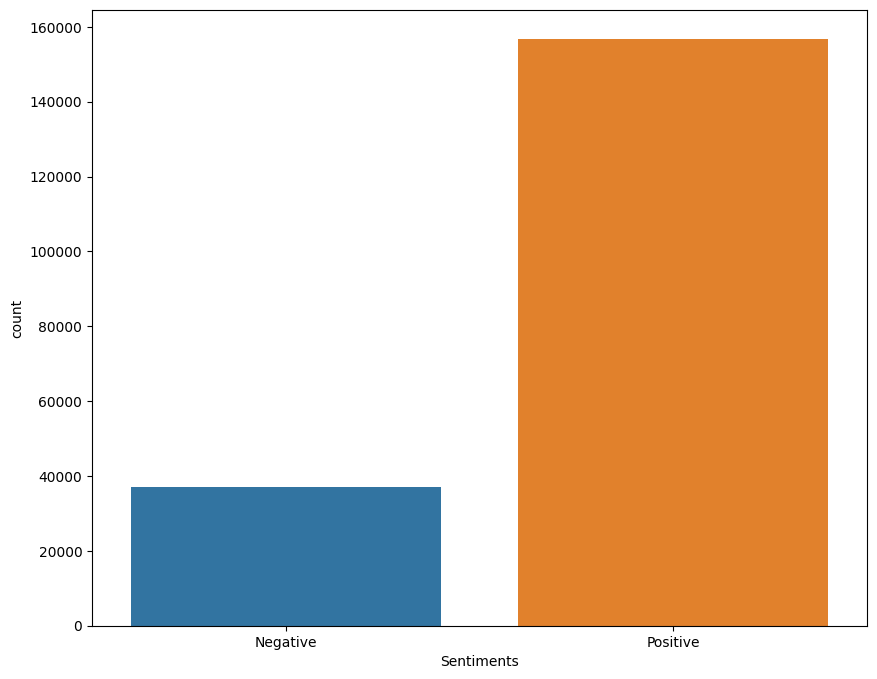

In [7]:
# let's look at the distribution of our classes ({0: 'Negative}, {1: 'Positive'})
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = df['label'])
x_labels = ['Negative', 'Positive']
ax.set_xticklabels(x_labels)
plt.xlabel('Sentiments')
plt.show()

As of now our data set is unbalanced with more positive tweets than negative tweets. Moreover the sheer amount of tweets we have is too much (~ 500,000), training models with this much data will be very slow. The following cell selects equal number (5000) of random positive and negative tweets to form a balanced dataset of 10,000 tweets

In [8]:
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000)) #randomly selecting the index 5000 negative tweets/posts
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000)) #randomly selecting the index 5000 positive tweets/posts
idx = np.concatenate((negative_idx, positive_idx)) # concatenating the indexes, we don't need to shuffle the indexes since sci-kit learn's train_test_split takes care of it
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1) # filtering out the indexes not present in idx
ttr_data

,text,label,language
0,Fk guys look at my shoulders. I'm standing str...,0.0,en
1,I have so much anxiety rn https://t.co/BOU9TXZ2vv,0.0,en
2,This is saying enough about the general mindse...,0.0,en
3,"Internet censorship:Stop Pipa,SOPA again,caref...",0.0,en
4,Homecoming may have been cancelled. But the da...,0.0,en
...,...,...,...
9995,Taxpayer funded ad encourages German women to ...,1.0,en
9996,Hope you all enjoy the #bankholiday weekend! W...,1.0,en
9997,What a lovely evening to ride bikes in the Pen...,1.0,en
9998,RT @hansungheeHSH: This comment is hands down ...,1.0,en


# Splitting Training and Testing Data

In [9]:
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)

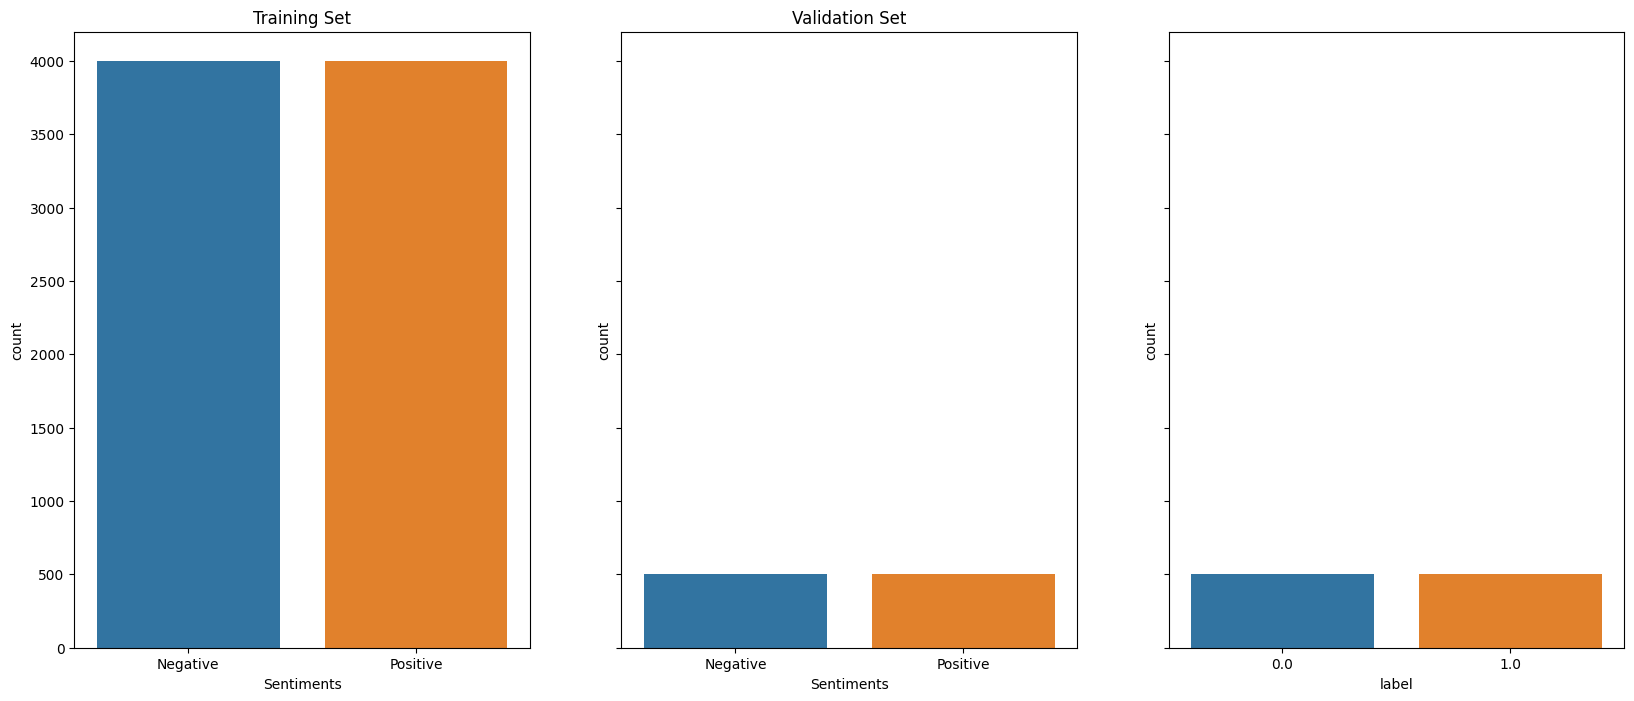

In [10]:
# let's check if both splits are balanced or not
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (20,8))
x_labels = ['Negative', 'Positive']
sns.countplot(x = y_train, ax = ax1)
ax1.set_title('Training Set')
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('Sentiments')
sns.countplot(x = y_test, ax = ax2)
ax2.set_title('Test Set')
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Sentiments')
sns.countplot(x = y_val, ax = ax3)
ax2.set_title('Validation Set')
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Sentiments')
plt.show()

# Text Pre-Processing

In [11]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

# defining a preprocessing function to be later used in conjunction with the Tfidf Vectorizer from Sci-kit Learn
def PreProcessor(text):
  lemmatizer = WordNetLemmatizer() 
  stopword = stopwords.words('english')
  text = BeautifulSoup(text, 'html.parser').get_text() #removing html tags
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Word Clouds

(-0.5, 399.5, 199.5, -0.5)

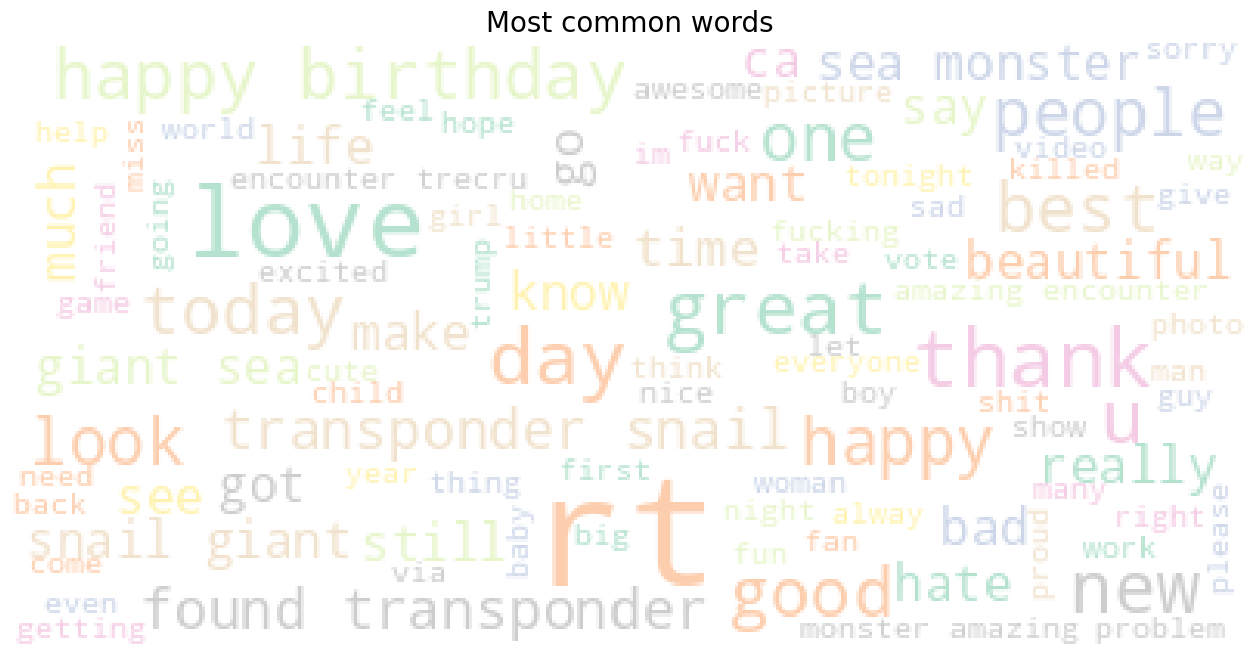

In [12]:
# let's checkput the word cloud of the tweets we have
from wordcloud import WordCloud
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(ttr_data['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

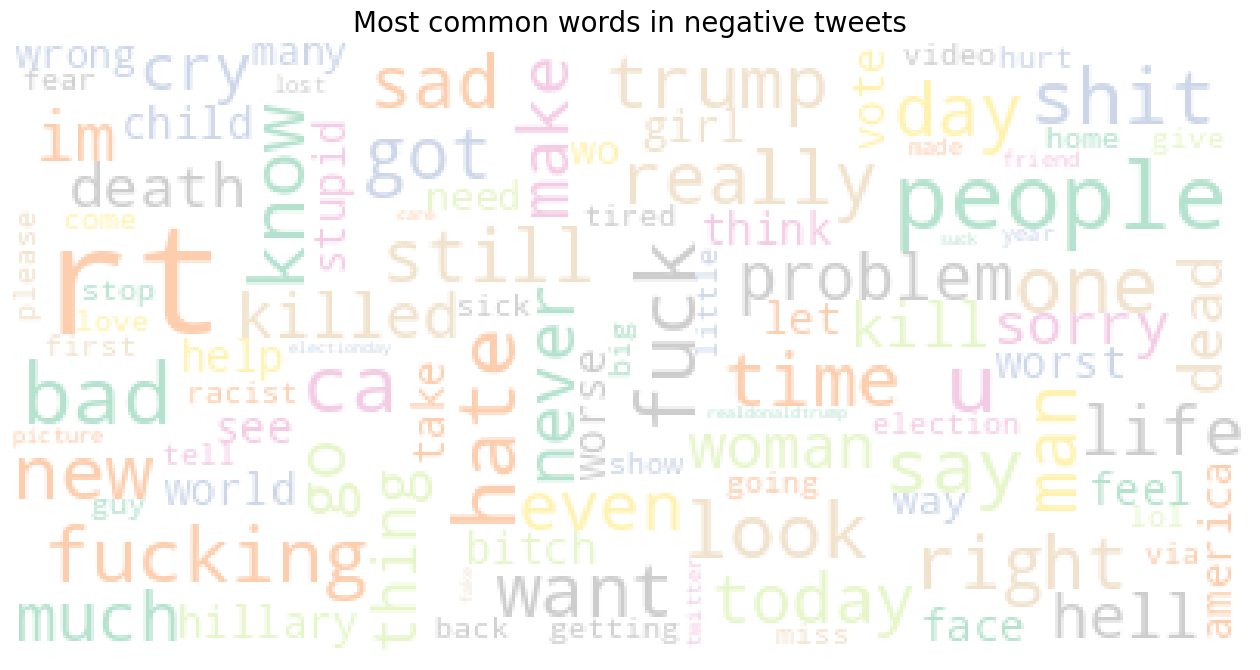

In [13]:
# let's check the word cloud of negative tweets
word_cloud = " ".join(ttr_data[ttr_data['label'] == 0]['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in negative tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

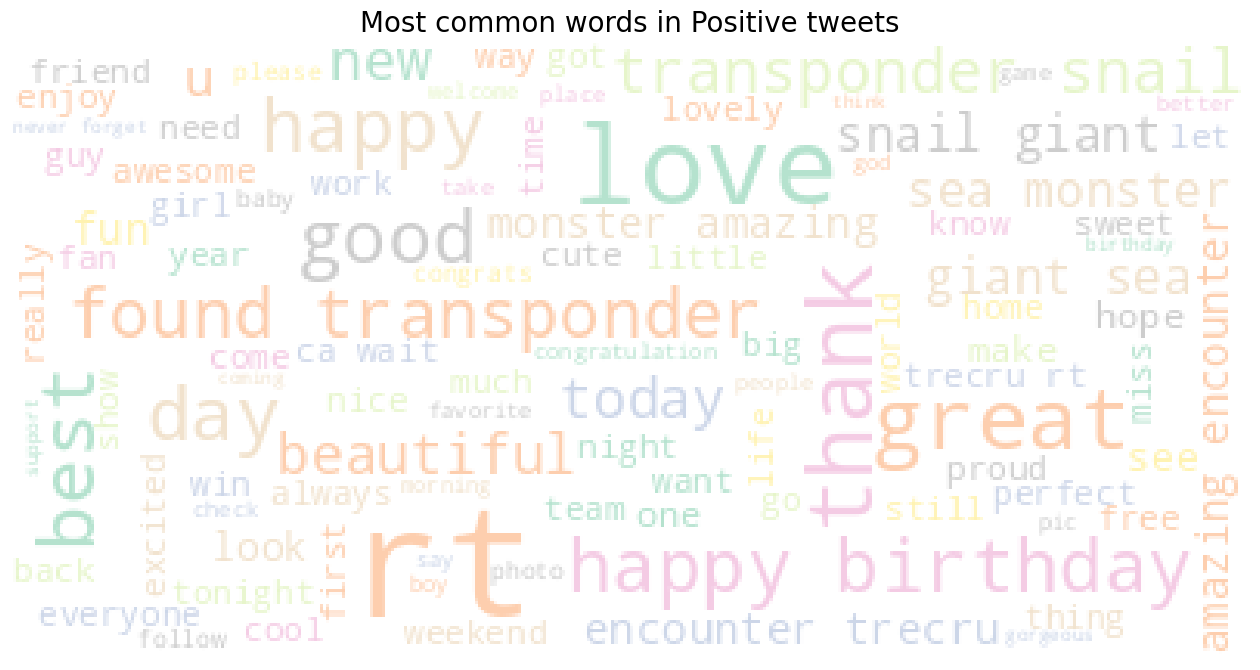

In [14]:
# let's check the word cloud of positive tweets
word_cloud = " ".join(ttr_data[ttr_data['label'] == 1]['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# TF-IDF Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# defining a TF-IDF vectorizing function which return the extracted TF-IDF feature in a dataframe
def Vectorize(data, Vectorizer):
  X = Vectorizer.transform(data)
  words = Vectorizer.get_feature_names_out()
  X = pd.DataFrame(X.toarray())
  X.columns = words
  return X

In [16]:
Vectorizer = TfidfVectorizer(analyzer = PreProcessor) # PreProcessor function we defined earlier used as an override to TfidfVectorizer's default pre-processing function
Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
X_train = Vectorize(X_train['text'], Fitted_Vectorizer) # transforming X_train accordingly

In [17]:
# after observing the resulting X_train features, it was found that it still has 
# words from other languages so this cell attempts to drop those features

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(word):
  try:
    return detect(word)
  except LangDetectException:
    return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']

In [18]:
len(english_words)

2963

In [19]:
X_train = X_train[english_words]

In [20]:
X_train # observe the difference in X_train.shape

,aaronsweather,abducted,abestof,aborted,abortion,abou,accomplished,accomplishment,account,accounting,...,yorkshire,yorkshirerugby,youarehere,youhavethepower,youngadultfiction,younow,youretheworst,youth,youthweeks,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Applying the same pre-processing to Validation Set
X_val = Vectorize(X_val['text'], Fitted_Vectorizer)

In [22]:
X_val = X_val[english_words]

In [23]:
X_val

,aaronsweather,abducted,abestof,aborted,abortion,abou,accomplished,accomplishment,account,accounting,...,yorkshire,yorkshirerugby,youarehere,youhavethepower,youngadultfiction,younow,youretheworst,youth,youthweeks,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Search for an Optimum Model

Since we have a very large number of features, we are going to apply Principal Component Analysis as the first step of our pipeline and different classifiers as the second step.

The following cell defines different Sci-Kit Learn Classifier models and their own parameter search space to be used in GridSearchCV to find the optimum hyperparameter combination for the classifier based on the f1_score of validation sets in a 5-fold Cross Validation Strategy

At the end a function is defined which helps to visualize the results of our hyparameter search

In [24]:
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pca = PCA()

kNN = KNeighborsClassifier()
kNN_param_grid = {'pca__n_components': [500, 1500],
                  'kNN__n_neighbors': [3, 5, 7], 
                  'kNN__p': [1, 2]}

lr = LogisticRegression(random_state = 4, max_iter = 1000)
lr_param_grid = {'pca__n_components': [500, 1500],
                 'lr__C': [0.1, 0.5, 1, 5], 
                 'lr__solver': ['newton-cg','lbfgs','liblinear','sag']}

svc = SVC(random_state = 4)
svc_param_grid = {'pca__n_components': [500, 1500],
                  'svc__C': [0.1, 0.5, 1, 5], 
                  'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
                  'svc__degree': [2,3,4]}

xgb = XGBClassifier(random_state = 4)
xgb_param_grid = {'pca__n_components': [500, 1500], 
                  'xgb__max_depth': [10, 20, 50],
                  'xgb__n_estimators': [50, 100]}

dtr = DecisionTreeClassifier(random_state = 4)
dtr_param_grid = {'pca__n_components': [500, 1500],
                  'dtr__criterion': ['gini', 'entropy', 'log_loss'], 
                  'dtr__max_depth': [10, 20, 50]}

rf = RandomForestClassifier(random_state = 4)
rf_param_grid = {'pca__n_components': [500, 1500],
                 'rf__n_estimators': [50, 100],
                 'rf__criterion': ['gini', 'entropy', 'log_loss'],
                 'rf__max_depth': [10, 20, 50]}

mlp = MLPClassifier(random_state = 4, max_iter = 1000)
mlp_param_grid = {'pca__n_components': [500, 1500],
                  'mlp__hidden_layer_sizes': [[100, 50], [50, 50]],
                  'mlp__activation': ['logistic', 'tanh', 'relu']}


models_dict = {'kNN': (kNN, kNN_param_grid),
               'lr': (lr, lr_param_grid),
               'svc': (svc, svc_param_grid),
               'xgb': (xgb, xgb_param_grid),
               'dtr': (dtr, dtr_param_grid),
               'rf': (rf, rf_param_grid),
               'mlp': (mlp, mlp_param_grid)}

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

    best_model = results.best_estimator_
    best_model.fit(X_train, y_train.values.ravel())
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)   
    print("model training score: %.3f" % f1_score(y_train.values, y_train_pred))
    print("model vaidation score: %.3f" % f1_score(y_val.values, y_val_pred))

The following cells show the hyperparameter search results for each of the classifiers defined, (a for loop could have been written for the following cells but we didn't have the resources to run the notebook for that long so we have separately searched the optimum hyperparameter combination for each classifer)

In [ ]:
# kNN Classifier
pipe = Pipeline(steps=[('pca', pca),
                       ('kNN', kNN)])
gridsearch = GridSearchCV(pipe, kNN_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

In [ ]:
# Logistic Regression
pipe = Pipeline(steps=[('pca', pca),
                       ('lr', lr)])
gridsearch = GridSearchCV(pipe, lr_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

In [ ]:
# Support Vector Machines
pipe = Pipeline(steps=[('pca', pca),
                       ('svc', svc)])
gridsearch = GridSearchCV(pipe, svc_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

In [ ]:
# XGBoost Classifer
pipe = Pipeline(steps=[('pca', pca),
                       ('xgb', xgb)])
gridsearch = GridSearchCV(pipe, xgb_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

In [ ]:
# Decision Tree Classifier
pipe = Pipeline(steps=[('pca', pca),
                       ('dtr', dtr)])
gridsearch = GridSearchCV(pipe, dtr_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

In [ ]:
# Random Forests Classifier
pipe = Pipeline(steps=[('pca', pca),
                       ('rf', rf)])
gridsearch = GridSearchCV(pipe, rf_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

In [ ]:
# Neural Networks (Multi Layer Perceptron Classifier)
pipe = Pipeline(steps=[('pca', pca),
                       ('mlp', mlp)])
gridsearch = GridSearchCV(pipe, mlp_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)

# Optimum Model

In [25]:
# Applying the same pre-processing to Validation Set
X_test = Vectorize(X_test['text'], Fitted_Vectorizer)

In [26]:
X_test = X_test[english_words]

According the f1 scores of training and validation sets our best model is the MLPClassifier model (Neural Networks) with parameter comnbination shown in the folllowing code cell

In [27]:
# Best Model Pipeline
best_model = Pipeline(steps=[('pca', PCA(n_components = 1500)),
                             ('mlp', MLPClassifier(random_state = 4, 
                                                   max_iter = 1000, 
                                                   activation = 'relu', 
                                                   hidden_layer_sizes = [100, 50]))])
best_model.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=1500)),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=1000,
                               random_state=4))])

In [28]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

print("Training Set F1 Score: ", f1_score(y_train.values, y_train_pred))
print("Validation Set F1 Score: ", f1_score(y_val.values, y_val_pred))
print("Test Set F1 Score: ", f1_score(y_test.values, y_test_pred))

Training Set F1 Score:  0.7824060588406642
Validation Set F1 Score:  0.572827417380661
Test Set F1 Score:  0.5629820051413882
